In [1]:
# import sys
# !{sys.executable} -m pip install pydot

# import sys
# !{sys.executable} -m pip install tensorflow


In [7]:
# import pydot
# print(pydot.__version__)


4.0.1


In [17]:
# !pip install keras==2.7.0
# !pip install tensorflow==2.7.0


ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.7.0


In [2]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [4]:
# import sys
# !{sys.executable} -m pip install scikeras




Defaulting to user installation because normal site-packages is not writeable
  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
Using cached scikeras-0.13.0-py3-none-any.whl (26 kB)


In [68]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pydot
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [69]:
# Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [70]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

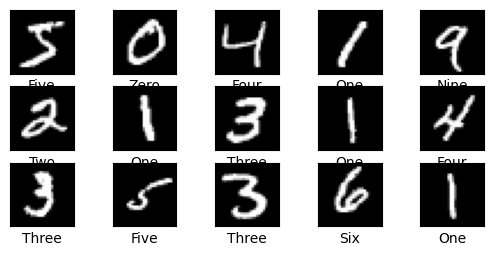

In [73]:
col_names = ['Zero', 'One','Two','Three','Four','Five','Six','Seven','Eight','Nine',]

plt.figure(figure =(10,10))
for i in range(15):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])

plt.show()

In [80]:
X_train_digit.shape

(60000, 28, 28)

In [81]:
# Convert 3D to 2D for ANN

X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [82]:
X_train_digit.shape

(60000, 784)

In [83]:
y_train_digit = to_categorical(y_train_digit, num_classes=10)
y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [84]:
y_test_digit[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [85]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10, activation='sigmoid')    
])

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,754 (874.04 KB)

 Trainable params: 222,986 (871.04 KB)

 Non-trainable params: 768 (3.00 KB)

In [87]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']       
)

In [88]:
history = model.fit(X_train_digit, y_train_digit, batch_size=1000, epochs=80, validation_data=(X_test_digit,y_test_digit) )

Epoch 1/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6803 - loss: 1.0526 - val_accuracy: 0.9169 - val_loss: 0.3039
Epoch 2/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8902 - loss: 0.4145 - val_accuracy: 0.9420 - val_loss: 0.1939
Epoch 3/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9231 - loss: 0.2873 - val_accuracy: 0.9559 - val_loss: 0.1497
Epoch 4/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9399 - loss: 0.2250 - val_accuracy: 0.9624 - val_loss: 0.1231
Epoch 5/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9494 - loss: 0.1877 - val_accuracy: 0.9679 - val_loss: 0.1102
Epoch 6/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9560 - loss: 0.1631 - val_accuracy: 0.9692 - val_loss: 0.1017
Epoch 7/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9614 - loss: 0.1419 - val_accuracy: 0.9721 - val_loss: 0.0910
Epoch 8/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9655 - loss: 0.1265 - val_accuracy: 0.9722 - val_loss

In [89]:
y_predict = model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step


In [90]:
y_predict = np.argmax(y_predict, axis=1)
y_text_digit_eval = np.argmax(y_test_digit, axis=1)

In [91]:
y_text_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

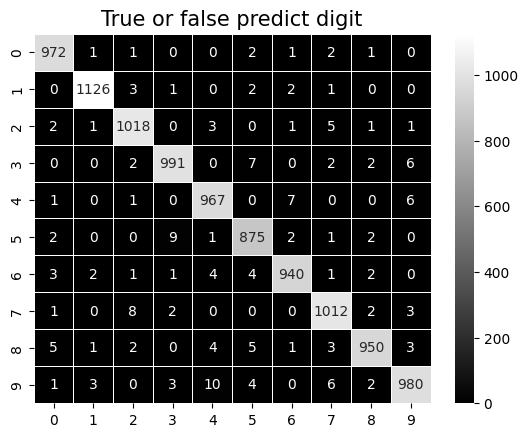

In [92]:
# confusion matrix for digit MNIST
con_mat  = confusion_matrix(y_text_digit_eval, y_predict)
# plt.style.use('seaborn-deep')
plt.figure(figure=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size':10}, linewidths=0.5, fmt='d', cmap='gray')
plt.title('True or false predict digit',fontsize=15)
plt.show()

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_text_digit_eval, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



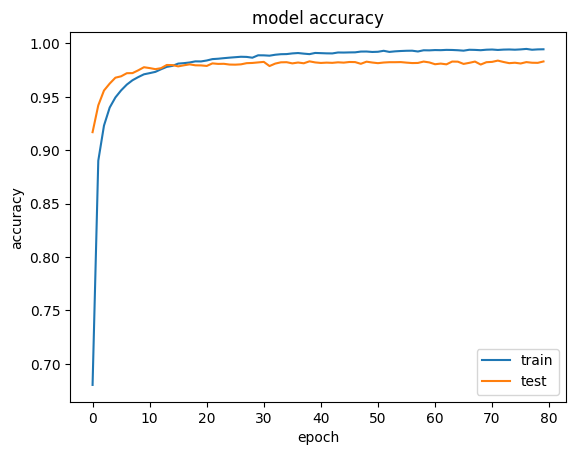

In [94]:
# summerize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='best')
plt.show()

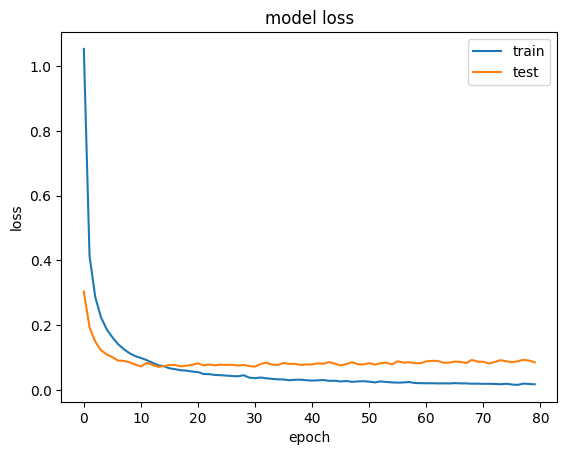

In [95]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='best')
plt.show()

In [96]:
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single = np.argmax(y_predict_single, axis=1)
y_test_digit_eval = np.argmax(y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [97]:
y_test_digit[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

Text(0.5, 0, 'Actual:Seven,Pred:Zero')

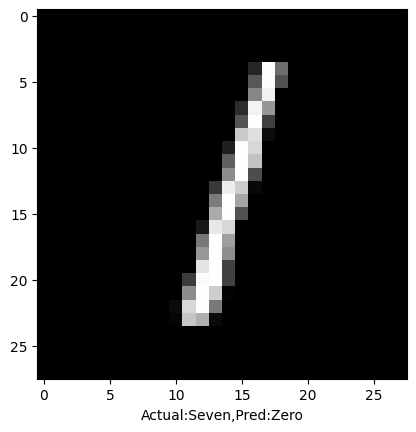

In [98]:
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel('Actual:{},Pred:{}'.format(
    col_names[np.argmax(y_test_digit[0])],
    col_names[np.argmax(y_predicts_single[0])]))